# Import all the Dependencies

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

 # Summary

In [15]:
CNN_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Building and Compiling the Model

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Corn or Maize\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Corn or Maize\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=100,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 4188 images belonging to 4 classes.
Found 676 images belonging to 4 classes.
Epoch 1/100
131/131 [==============================] - 49s 376ms/step - loss: 0.1638 - accuracy: 0.9353 - val_loss: 0.2223 - val_accuracy: 0.9112
Epoch 2/100
131/131 [==============================] - 54s 412ms/step - loss: 0.1614 - accuracy: 0.9367 - val_loss: 0.2111 - val_accuracy: 0.9157
Epoch 3/100
131/131 [==============================] - 54s 411ms/step - loss: 0.1495 - accuracy: 0.9394 - val_loss: 0.2162 - val_accuracy: 0.9142
Epoch 4/100
131/131 [==============================] - 54s 411ms/step - loss: 0.1588 - accuracy: 0.9343 - val_loss: 0.2563 - val_accuracy: 0.9142
Epoch 5/100
131/131 [==============================] - 54s 415ms/step - loss: 0.1588 - accuracy: 0.9353 - val_loss: 0.2176 - val_accuracy: 0.9098
Epoch 6/100
131/131 [==============================] - 54s 411ms/step - loss: 0.1689 - accuracy: 0.9351 - val_loss: 0.1954 - val_accuracy: 0.9260
Epoch 7/100
131/131 [====================

131/131 [==============================] - 45s 348ms/step - loss: 0.1404 - accuracy: 0.9468 - val_loss: 0.1778 - val_accuracy: 0.9334
Epoch 57/100
131/131 [==============================] - 46s 350ms/step - loss: 0.1414 - accuracy: 0.9415 - val_loss: 0.1730 - val_accuracy: 0.9349
Epoch 58/100
131/131 [==============================] - 82s 631ms/step - loss: 0.1537 - accuracy: 0.9360 - val_loss: 0.2973 - val_accuracy: 0.8757
Epoch 59/100
131/131 [==============================] - 58s 442ms/step - loss: 0.1379 - accuracy: 0.9479 - val_loss: 0.2012 - val_accuracy: 0.9216
Epoch 60/100
131/131 [==============================] - 54s 410ms/step - loss: 0.1344 - accuracy: 0.9439 - val_loss: 0.1638 - val_accuracy: 0.9379
Epoch 61/100
131/131 [==============================] - 53s 409ms/step - loss: 0.1512 - accuracy: 0.9386 - val_loss: 0.1665 - val_accuracy: 0.9364
Epoch 62/100
131/131 [==============================] - 56s 427ms/step - loss: 0.1294 - accuracy: 0.9511 - val_loss: 0.1712 - val_a

# Scores

In [12]:
scores = CNN_Classifier.evaluate(training_set)

131/131 [==============================] - 118s 904ms/step - loss: 0.1525 - accuracy: 0.9394


# Saving the Model

In [6]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\corn_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\corn_model.h5')

# Plotting

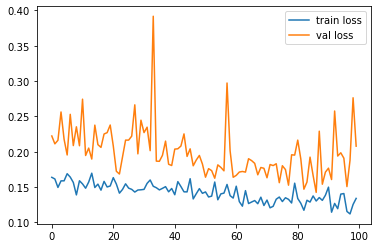

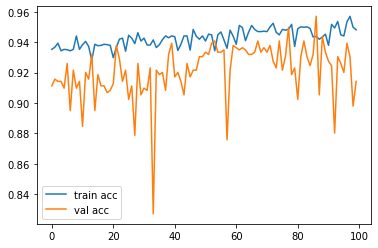

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [8]:
training_set.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [9]:
class_names = list(training_set.class_indices.keys())
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [10]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  ...
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]]

 [[0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  ...
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]]

 [[0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  [0.53333336 0.6509804  0.4156863 ]
  ...
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]
  [0.4431373  0.6117647  0.33333334]]

 ...

 [[0.57254905 0.6784314  0.40784317]
  [0.57254905 0.6784314  0.40784317]
  [0.57254905 0.6784314  0.40784317]
  ...
  [0.29803923 0.43137258 0.14117648]
  [0.29803923 0.43137258 0.14117648]
  [0.29803923 0.43137258 0.14117648]]

 [[0.57254905 0.6784314  0.40784317]
  [0.57254905 0.6784314  0.40784317]


# Run prediction on a sample image

first image to predict
actual label: Common_Rust
1/1 [==============================] - 1s 730ms/step
predicted label: Common_Rust


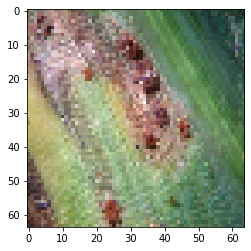

In [11]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break